### Import Libraries

In [11]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

### Load Images

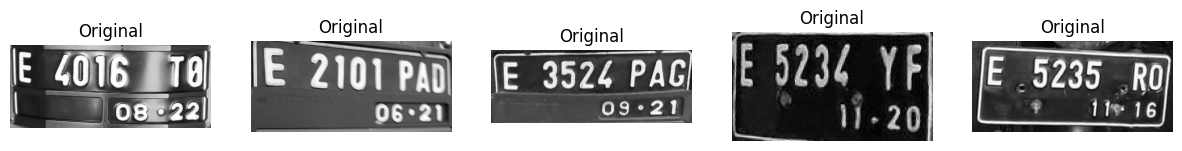

In [4]:
img_dir = './Dataset'

files = os.listdir(img_dir)
img_files = [f for f in files if f.endswith('.jpg') or f.endswith('.png')]
original_images = [cv.imread(os.path.join(img_dir, f)) for f in img_files]

fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ax.imshow(rgb_image, cmap='gray')
    ax.set_title('Original')
    ax.axis('off')
plt.show()


### Plot the Color Pixels

In [5]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i] / 255.0  # Normalize colors to 0-1 range
    R, G, B = data[i].T / 255.0  # Normalize data to 0-1 range

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

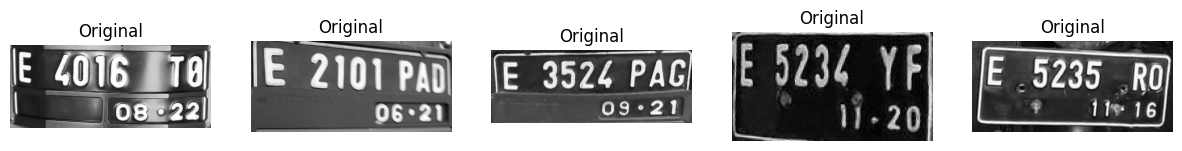

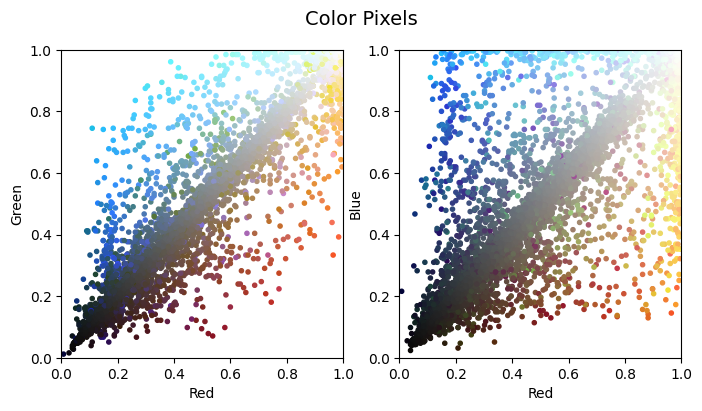

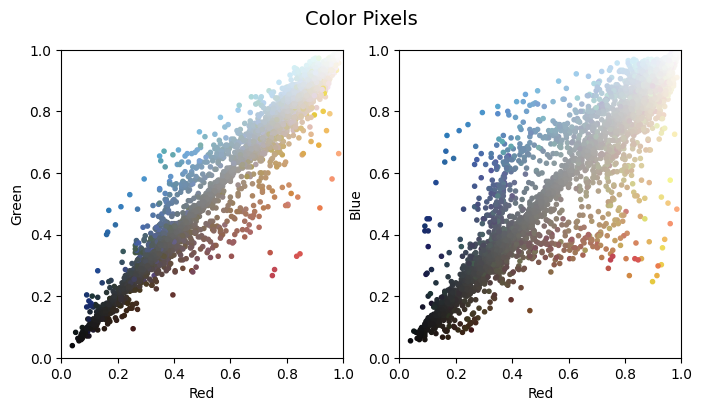

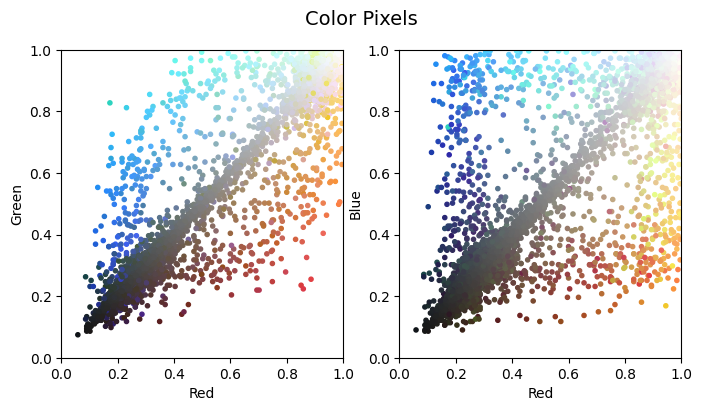

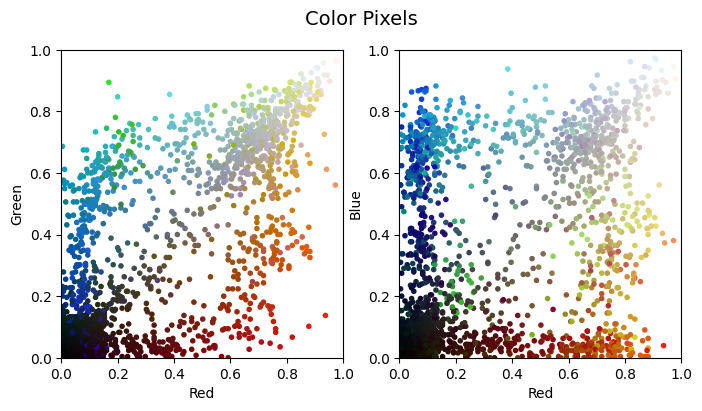

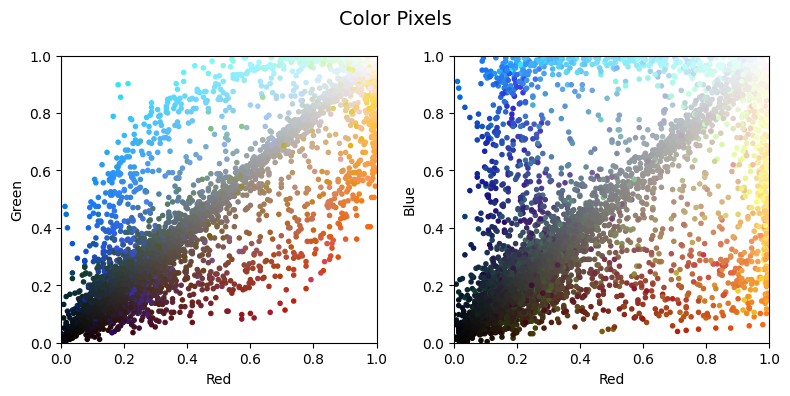

In [9]:
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))

for i, (ax, image) in enumerate(zip(axes, original_images)):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ax.imshow(gray_image, cmap='gray')
    ax.set_title('Original')
    ax.axis('off')

    flattened_data = gray_image.reshape(-1, 3)

    # Call plot_pixels with normalized data
    plot_pixels(flattened_data, title='Color Pixels')

plt.tight_layout()
plt.show()

### K-Means Clustering

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


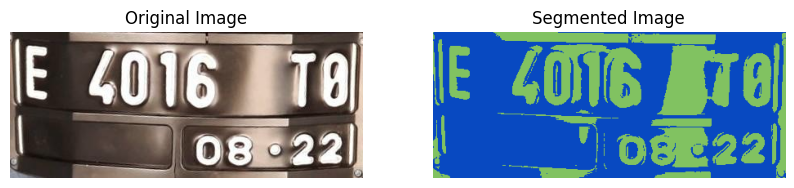

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


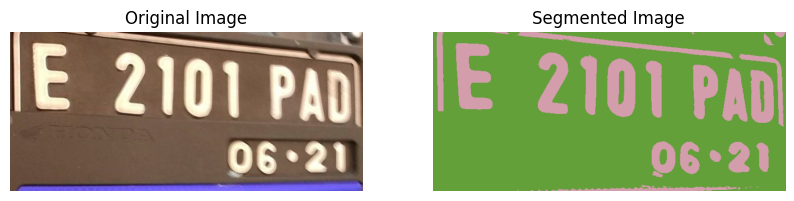

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


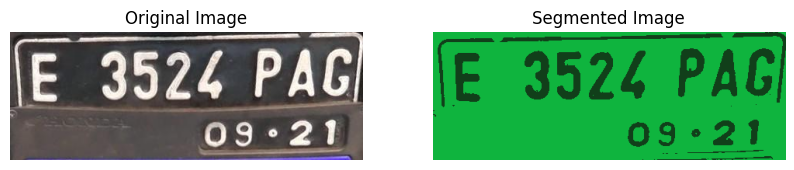

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


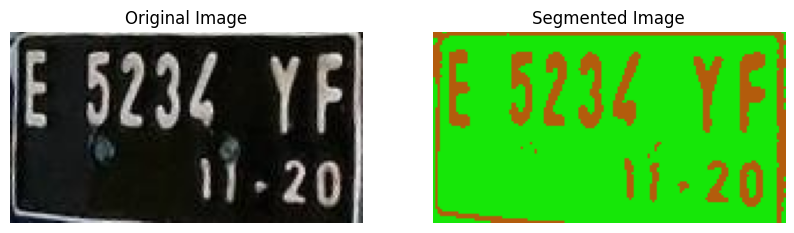

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


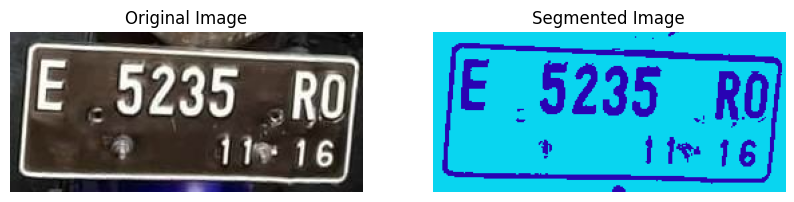

In [27]:
# Determine the desired number of clusters
num_clusters = 2

# Initialize the K-Means model with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Loop over all images and fit the K-Means model to each image
for i, image in enumerate(original_images):
	# Reshape the image into a 2D array (for K-Means)
	image_reshape = image.reshape((-1, 3))

	# Fit the K-Means model to the reshaped image data
	kmeans.fit(image_reshape)

	# Reshape the cluster labels back to the original shape
	cluster_labels = kmeans.labels_.reshape(image.shape[:2])

	# Create a new image with the segmented regions
	segmented_image = image.copy()
	for j in range(num_clusters):
		segmented_image[cluster_labels == j] = np.random.randint(0, 255, size=3)

	# Display the original and segmented images side by side
	fig, axes = plt.subplots(1, 2, figsize=(10, 5))
	axes[0].imshow(image)
	axes[0].set_title('Original Image')
	axes[0].axis('off')
	axes[1].imshow(cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB))
	axes[1].set_title('Segmented Image')
	axes[1].axis('off')
	plt.show()


### Thresholding

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


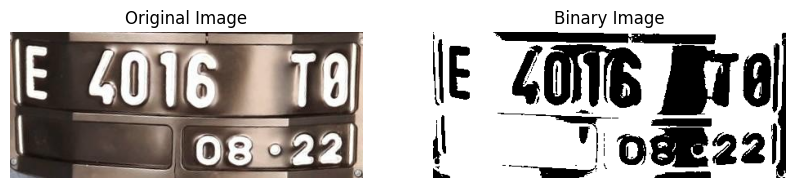

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


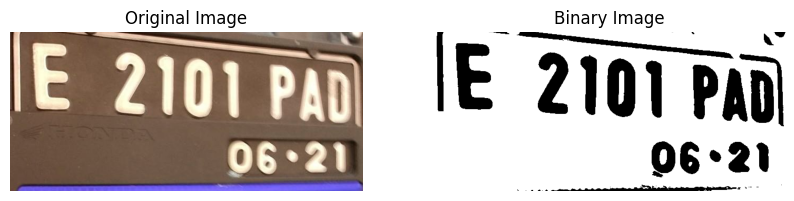

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


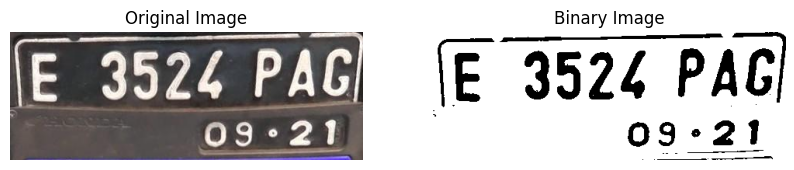

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


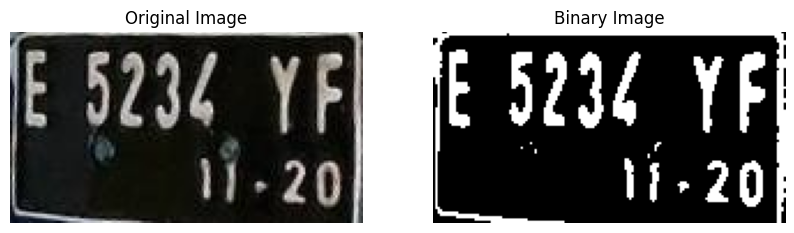

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


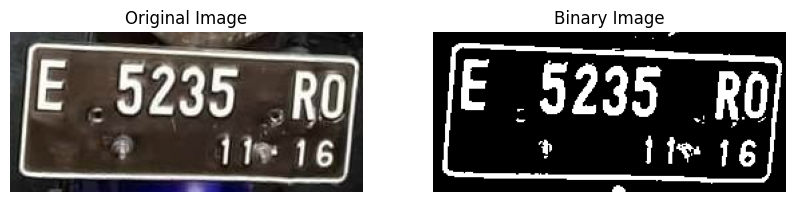

In [33]:
# Loop over all images
for i, image in enumerate(original_images):
	# Reshape the image into a 2D array (for K-Means)
	image_reshape = image.reshape((-1, 3))

	# Fit the K-Means model to the reshaped image data
	kmeans.fit(image_reshape)

	# Reshape the cluster labels back to the original shape
	cluster_labels = kmeans.labels_.reshape(image.shape[:2])

	# Create a new image with the segmented regions
	segmented_image = image.copy()
	for j in range(num_clusters):
		segmented_image[cluster_labels == j] = np.random.randint(0, 255, size=3)

	# Convert segmented image to binary image
	gray_image = cv.cvtColor(segmented_image, cv.COLOR_BGR2GRAY)
	_, binary_image = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)

	# Decrease brightness of binary image
	brightness = 50
	binary_image = np.clip(binary_image - brightness, 0, 255).astype(np.uint8)

	# Display the original and segmented images side by side
	fig, axes = plt.subplots(1, 2, figsize=(10, 5))
	axes[0].imshow(image)
	axes[0].set_title('Original Image')
	axes[0].axis('off')
	axes[1].imshow(binary_image, cmap='gray')
	axes[1].set_title('Binary Image')
	axes[1].axis('off')
	plt.show()
